<a href="https://colab.research.google.com/github/Fatima-Alzaher/myproject/blob/main/arima_model_for_A_OTHAIM_MARKET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a class="anchor" id="0"></a>

# **ARIMA Model for Time Series Forecasting**




 I will discuss **ARIMA Model for time series forecasting**. ARIMA model is used to forecast a time series using the series past values.

So, let's get started.

<a class="anchor" id="0.1"></a>
# **Table of Contents**


1.	[Introduction to Time Series Forecasting](#1)
2.	[Introduction to ARIMA Models](#2)
5.	[How to find the order of differencing (d) in ARIMA model](#5)
6.	[How to find the order of the AR term (p)](#6)
7.	[How to find the order of the MA term (q)](#7)
9.	[How to build the ARIMA Model](#9)
10.	[Find the optimal ARIMA model using Out-of-Time Cross validation](#10)
11.	[Accuracy Metrics for Time Series Forecast](#11)



<!DOCTYPE html>
<html lang="en">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <title>Introduction to Time Series Forecasting</title>
</head>
<body>
  <h1>1. Introduction to Time Series Forecasting <a class="anchor" id="1"></a></h1>

  <ul>
        <li><strong>Time Series:</strong> A series of data points recorded at different time intervals.</li>
        <li><strong>Time Series Forecasting:</strong> Predicting future values based on past results.</li>
  </ul>

   <p>Forecasting is crucial for anticipating future trends, and it can be divided into:</p>

  <ol>
        <li><strong>Univariate Time Series Forecasting:</strong> Uses only past values of the series for prediction.</li>
        <li><strong>Multivariate Time Series Forecasting:</strong> Incorporates external predictors for forecasting.</li>
  </ol>

  <p>This notebook focuses on <strong>ARIMA modeling</strong> for time series forecasting.</p>
</body>
</html>


<!DOCTYPE html>
<html lang="en">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <title>Introduction to ARIMA Models</title>
</head>
<body>
  <h1>2. Introduction to ARIMA Models <a class="anchor" id="2"></a></h1>

  <ul>
        <li><strong>ARIMA:</strong> Autoregressive Integrated Moving Average Model</li>
        <li>ARIMA models explain a time series based on its own past values, allowing future value prediction.</li>
        <li>They are suitable for non-seasonal time series with patterns.</li>
  </ul>

  <p>ARIMA models are specified by three order parameters: (p, d, q), where:</p>

  <ul>
        <li><strong>p:</strong> Order of the AR term (Autoregression)</li>
        <li><strong>d:</strong> Number of differencing required to make the time series stationary (Integration)</li>
       <li><strong>q:</strong> Order of the MA term (Moving Average)</li>
  </ul>

  <p>Key components of ARIMA models:</p>

  <ul>
        <li><strong>AR(p) Autoregression:</strong> Uses past values in the regression equation.</li>
        <li><strong>I(d) Integration:</strong> Differencing of observations to achieve stationarity.</li>
        <li><strong>MA(q) Moving Average:</strong> Models residual errors from a moving average applied to lagged observations.</li>
  </ul>
</body>
</html>


## **Types of ARIMA Model**


- **ARIMA** : Non-seasonal Autoregressive Integrated Moving Averages
- **SARIMA** : Seasonal ARIMA
- **SARIMAX** : Seasonal ARIMA with exogenous variables



If a time series, has seasonal patterns, then we need to add seasonal terms and it becomes SARIMA, short for **Seasonal ARIMA**.

## **Routine set up**

In [ ]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt


## **Import data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = '/content/drive/MyDrive/A.OTHAIM MARKET_4001.csv'

import pandas as pd

# Load the DataFrame from a CSV file
df = pd.read_csv(path)
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
df.sort_index(inplace=True)

df.head()

,open,high,low,close,change,change_percent,volume_traded,value_traded_SAR,number_trades
date,,,,,,,,,
2008-07-14,20.76,21.50,16.90,17.25,17.25,0.00,57427768.0,1.074430e+09,285932
2008-07-15,16.76,16.90,15.56,15.55,-1.70,-9.86,15390656.0,2.476627e+08,32679
2008-07-16,14.80,15.40,14.06,14.20,-1.35,-8.68,18149148.0,2.686325e+08,34529
2008-07-19,14.66,15.56,14.56,15.45,1.25,8.80,20190976.0,3.078806e+08,22744
2008-07-20,15.46,15.46,14.46,14.80,-0.65,-4.21,21883368.0,3.286395e+08,17929


- Now, we will continue with our example.

In [ ]:
import pandas as pd
import numpy as np


def dataset_info(df):
    print("Basic Information about the Dataset:")
    print("===================================")
    # Display the first few rows of the dataset
    print("\nFirst 5 rows of the dataset:")
    print(df.head())

    # Display the data types of each column
    print("\nData Types:")
    print(df.dtypes)

    # Display the number of missing values per column
    print("\nMissing Values:")
    print(df.isnull().sum())

    # Display summary statistics
    print("\nSummary Statistics:")
    print(df.describe())

    # Display the number of rows and columns
    print("\nNumber of rows and columns:")
    print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

    # Display the column names
    print("\nColumn Names:")
    print(df.columns.tolist())

    # Uniqueness and count of values in each column if applicable
    for column in df.columns:
        if df[column].dtype == 'object' or len(df[column].unique()) < 20:
            print(f"\nUnique values in {column}:")
            print(df[column].value_counts())

# Execute the function
dataset_info(df)


Basic Information about the Dataset:

First 5 rows of the dataset:
             open   high    low  close  change  change_percent  volume_traded  \
date                                                                            
2008-07-14  20.76  21.50  16.90  17.25   17.25            0.00     57427768.0   
2008-07-15  16.76  16.90  15.56  15.55   -1.70           -9.86     15390656.0   
2008-07-16  14.80  15.40  14.06  14.20   -1.35           -8.68     18149148.0   
2008-07-19  14.66  15.56  14.56  15.45    1.25            8.80     20190976.0   
2008-07-20  15.46  15.46  14.46  14.80   -0.65           -4.21     21883368.0   

            value_traded_SAR  number_trades  
date                                         
2008-07-14      1.074430e+09         285932  
2008-07-15      2.476627e+08          32679  
2008-07-16      2.686325e+08          34529  
2008-07-19      3.078806e+08          22744  
2008-07-20      3.286395e+08          17929  

Data Types:
open                float64
hi

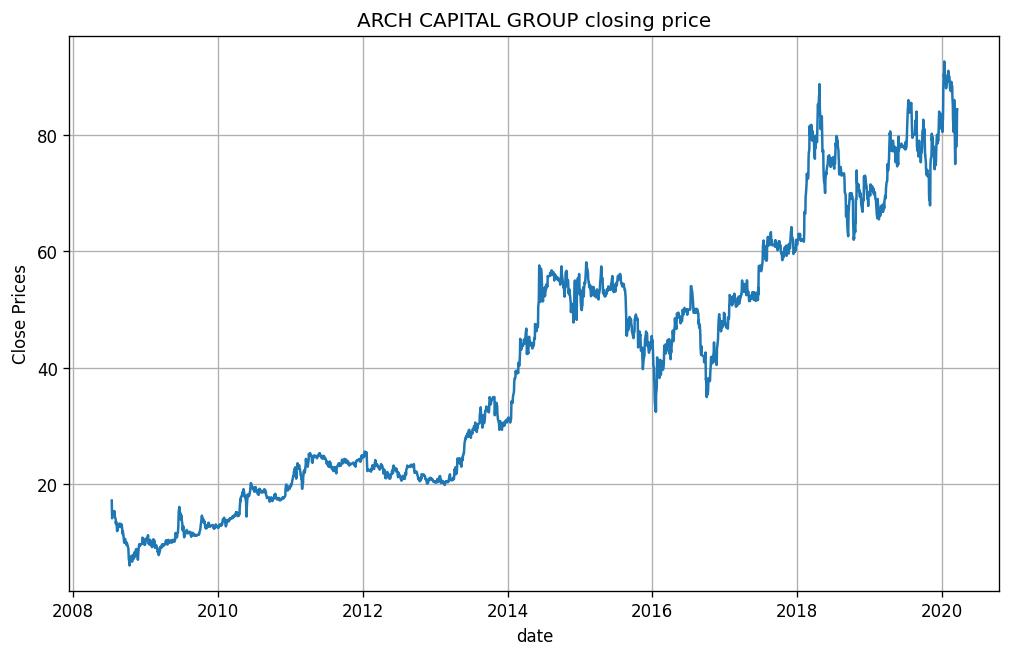

In [ ]:
#plot close price
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('date')
plt.ylabel('Close Prices')
plt.plot(df['close'])
plt.title('ARCH CAPITAL GROUP closing price')
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df['close'].dropna())
print('ADF Statistic:', result[0])
print('p-value:', result[1])


ADF Statistic: -0.3099669222754853
p-value: 0.9240808076381443


- Since the p-value (0.355) exceeds the significance level of 0.05, we fail to reject the null hypothesis, which suggests that the series is non-stationary. To address this, we'll difference the series and examine the autocorrelation plot to determine if differencing helps achieve stationarity.

# **3.How to find the order of differencing (d) in ARIMA model** <a class="anchor" id="5"></a>

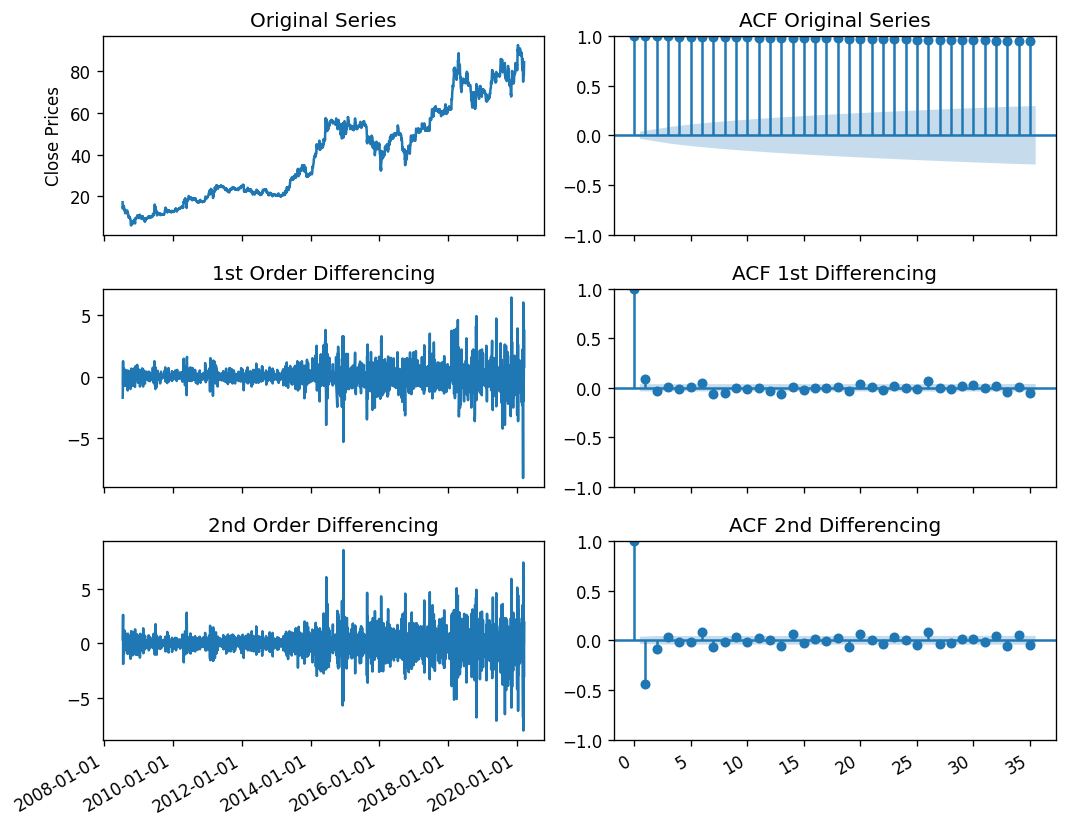

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.dates import DateFormatter
plt.rcParams.update({'figure.figsize': (9, 7), 'figure.dpi': 120})

# Original Series
fig, axes = plt.subplots(3, 2, sharex='col')  # Share x-axis only within columns

axes[0, 0].plot(df.index, df['close'])
axes[0, 0].set_title('Original Series')
axes[0, 0].set_xlabel('Date')
axes[0, 0].set_ylabel('Close Prices')

date_format = DateFormatter('%Y-%m-%d')
axes[0, 0].xaxis.set_major_formatter(date_format)

plot_acf(df['close'], ax=axes[0, 1], title="ACF Original Series")

# 1st Differencing
diff1 = df['close'].diff().dropna()
axes[1, 0].plot(df.index[1:], diff1)
axes[1, 0].set_title('1st Order Differencing')
axes[1, 0].xaxis.set_major_formatter(date_format)

# Calculate autocorrelation for 1st differencing
plot_acf(diff1, ax=axes[1, 1], title="ACF 1st Differencing")

# 2nd Differencing
diff2 = df['close'].diff().diff().dropna()
axes[2, 0].plot(df.index[2:], diff2)
axes[2, 0].set_title('2nd Order Differencing')
axes[2, 0].xaxis.set_major_formatter(date_format)

# Calculate autocorrelation for 2nd differencing
plot_acf(diff2, ax=axes[2, 1], title="ACF 2nd Differencing")

# Ensure the dates are readable
fig.autofmt_xdate()

plt.tight_layout()
plt.show()


The original series ACF shows a significant autocorrelation at lag 1, indicating a strong linear relationship between consecutive observations. The first differencing ACF reveals no significant autocorrelation at any lag, suggesting that the first difference adequately removes the trend from the original series.

# **4.How to find the order of the AR term (p)** <a class="anchor" id="6"></a>





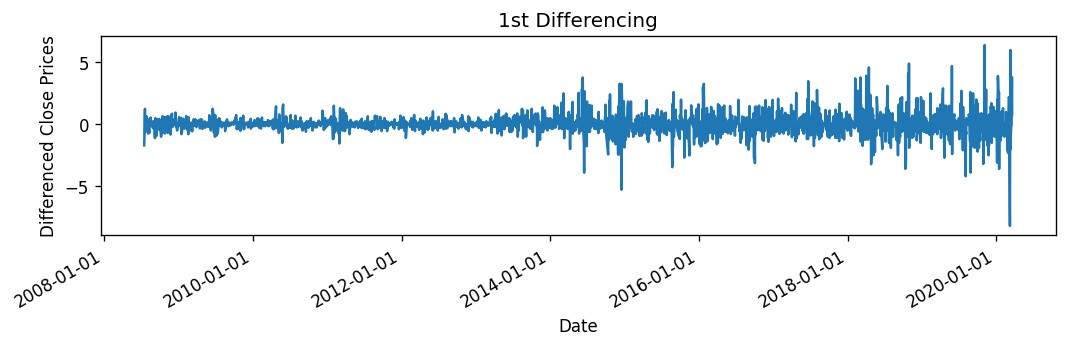

<Figure size 1080x360 with 0 Axes>

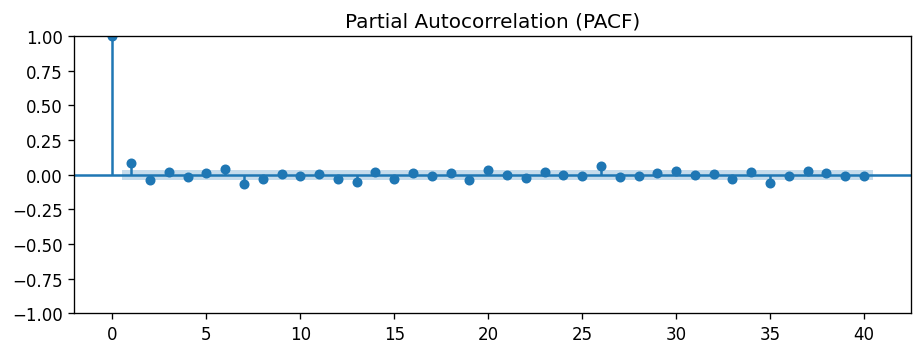

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import pandas as pd
from statsmodels.graphics.tsaplots import plot_pacf


df_filtered = df[df.index >= '2008-07-14']

# Compute first differencing of the 'close' prices to stabilize the mean
first_diff = df_filtered['close'].diff().dropna()

# Plot the first differencing with dates
plt.figure(figsize=(9, 3))
plt.plot(df_filtered.index[1:], first_diff)
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))
plt.gcf().autofmt_xdate()
plt.title('1st Differencing')
plt.xlabel('Date')
plt.ylabel('Differenced Close Prices')
plt.tight_layout()
plt.show()

# Create a figure for the PACF plot
plt.figure(figsize=(9, 3))
plot_pacf(first_diff, lags=40, title='Partial Autocorrelation (PACF)')
plt.show()


The PACF of the first differencing series shows a significant spike at lag 0, indicating a strong correlation between consecutive observations. This suggests that the first difference effectively removes the trend from the original series, leaving a stationary time series.

# **5.How to find the order of the MA term (q)** <a class="anchor" id="7"></a>




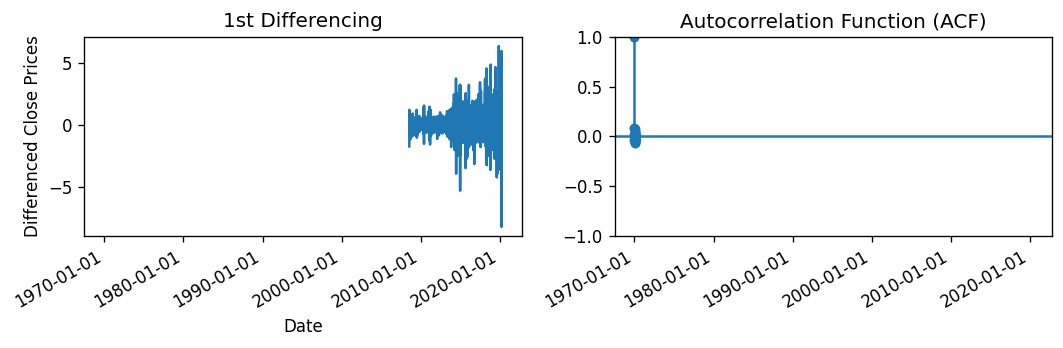

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
import pandas as pd
from matplotlib.dates import DateFormatter

df.sort_index(inplace=True)

plt.rcParams.update({'figure.figsize': (9, 3), 'figure.dpi': 120})

first_diff = df['close'].diff().dropna()
fig, axes = plt.subplots(1, 2, sharex=True)

axes[0].plot(df.index[1:], first_diff)
axes[0].set_title('1st Differencing')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Differenced Close Prices')

plot_acf(first_diff, ax=axes[1])
axes[1].set_title('Autocorrelation Function (ACF)')

axes[0].xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))

fig.autofmt_xdate()

plt.tight_layout()
plt.show()


- The ACF plot after first differencing helps identify the presence of serial correlation in the data and provides insights into potential ARIMA model specifications.

# **6. How to build the ARIMA Model** <a class="anchor" id="9"></a>




Now, we have determined the values of p, d and q. We have everything needed to fit the ARIMA model. We will use the ARIMA() implementation in the statsmodels package.

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
# Initialize and fit the ARIMA model with order (1, 1, 2)
model = ARIMA(df['close'], order=(1, 1, 2))
model_fit = model.fit()

# Print the summary of the model fit
print(model_fit.summary())


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                 2914
Model:                 ARIMA(1, 1, 2)   Log Likelihood               -3433.408
Date:                Sat, 20 Apr 2024   AIC                           6874.815
Time:                        23:02:01   BIC                           6898.723
Sample:                             0   HQIC                          6883.428
                               - 2914                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2439      0.333     -0.733      0.464      -0.896       0.408
ma.L1          0.3326      0.333      0.999      0.318      -0.320       0.985
ma.L2         -0.0122      0.032     -0.385      0.7

The model summary includes a coefficients table, where the 'coef' values represent the weights of the respective terms. Notably, the MA2 term's coefficient is near zero, and its P-value is significantly high at 0.728, indicating it's not statistically significant (P-values should ideally be less than 0.05 for significance). Given this, we will rebuild the model excluding the MA2 term to potentially improve its efficacy.

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
# 1,1,1 ARIMA Model
model = ARIMA(df['close'], order=(1,1,1))
model_fit = model.fit()

print(model_fit.summary())


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                 2914
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3433.456
Date:                Sat, 20 Apr 2024   AIC                           6872.912
Time:                        23:02:11   BIC                           6890.842
Sample:                             0   HQIC                          6879.371
                               - 2914                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3301      0.104     -3.161      0.002      -0.535      -0.125
ma.L1          0.4200      0.100      4.182      0.000       0.223       0.617
sigma2         0.6184      0.006     99.071      0.0

- The updated model SARIMAX(1, 1, 1) shows an improvement with a reduced AIC of 6872.912, which suggests a better fit. The p-values for the AR1 and MA1 terms have improved significantly, both well below 0.05, indicating their strong significance in the model.

- Next, we should plot the residuals to verify that they exhibit constant mean and variance, ensuring there are no hidden patterns that could affect the model's accuracy.

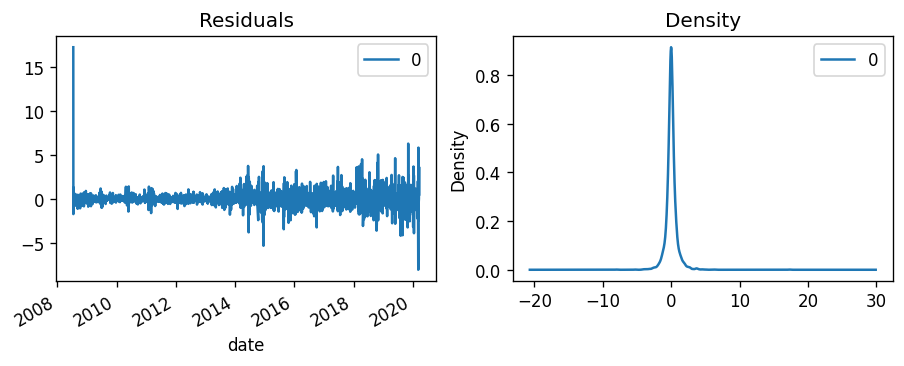

In [ ]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

The residual analysis indicates that the model's errors are relatively consistent and centered around 0, with a minor deviation observed at 7. Further investigation may be required to understand the cause of this deviation and assess its impact on the model's performance.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


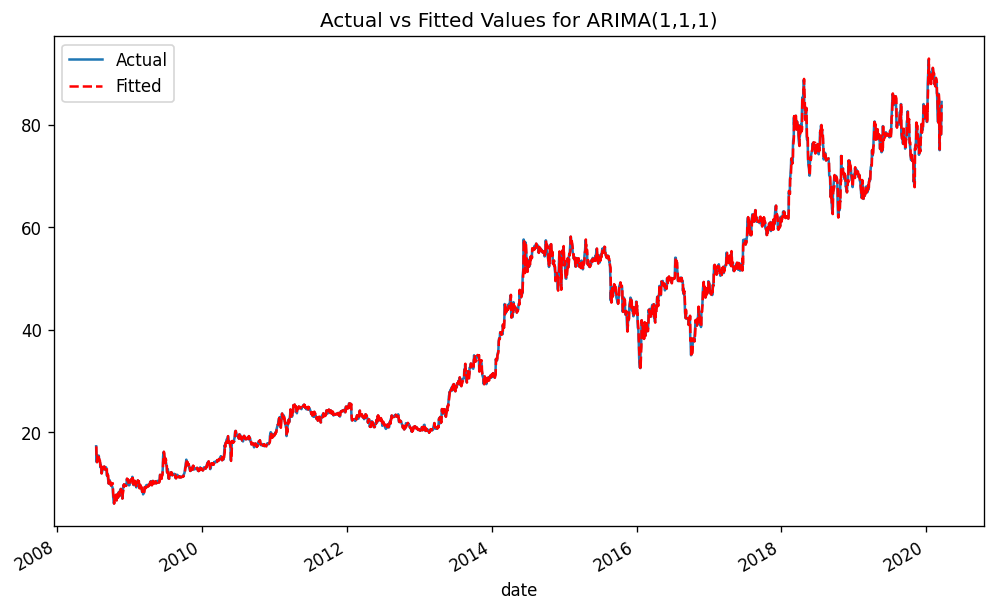

In [ ]:

from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Assuming 'close' is the correct column
model = ARIMA(df['close'], order=(1,1,1))
model_fit = model.fit()

fig, ax = plt.subplots(figsize=(10, 6))
df['close'].plot(ax=ax)

# Get the fitted values
fitted_values = model_fit.predict(start=df['close'].index[1], end=df['close'].index[-1], dynamic=False)
fitted_values.plot(ax=ax, style='r--')

ax.legend(['Actual', 'Fitted'])
plt.title('Actual vs Fitted Values for ARIMA(1,1,1)')
plt.show()


- When we set dynamic=False the in-sample lagged values are used for prediction. That is, the model gets trained up until the previous value to make the next prediction. This can make the fitted forecast and actuals look artificially good.

- So, we seem to have a decent ARIMA model. But, we can’t say that this is the best ARIMA model because we haven’t actually forecasted into the future and compared the forecast with the actual performance.

- So, the real validation we need now is the Out-of-Time cross-validation, discussed next.

# **7. Find the optimal ARIMA model using Out-of-Time Cross validation** <a class="anchor" id="10"></a>



- In Out-of-Time cross-validation, we move backwards in time and forecast into the future to as many steps we took back. Then we compare the forecast against the actuals.

- To do so, we will create the training and testing dataset by splitting the time series into 2 contiguous parts in a reasonable proportion based on time frequency of series.

In [ ]:
from statsmodels.tsa.stattools import acf

# Ensure 'close' is the correct column for time series data
train = df['close'][:2040]
test = df['close'][2040:]


- Now, we will build the ARIMA model on training dataset, forecast and plot it.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

874


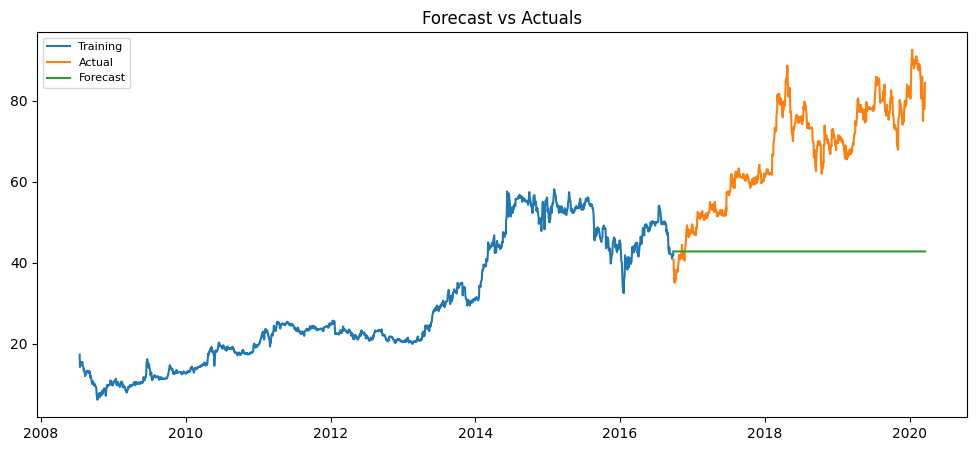

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import pandas as pd

model = ARIMA(train, order=(1, 1, 1))
fitted = model.fit()

# Forecast
forecast_result = fitted.get_forecast(steps=len(test))
fc = forecast_result.predicted_mean
conf = forecast_result.conf_int(alpha=0.05)

# Making these as pandas series for easy plotting
print(len(fc))
fc_series = pd.Series(fc)
fc_series.index = test.index

lower_series = pd.Series(conf.iloc[:, 0], index=test.index)
upper_series = pd.Series(conf.iloc[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='Training')
plt.plot(test, label='Actual')
plt.plot(fc_series, label='Forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()



- From the above chart, the ARIMA(1,1,1) model seems to predict a correct forecast. The actual observed values lie within the 95% confidence band.

- But, we can see that the predicted forecasts is consistently below the actuals. That means, by adding a small constant to our forecast, the accuracy will certainly improve.

- So, in this case, we should increase the order of differencing to two (d=2) and iteratively increase p and q up to 5 to see which model gives least AIC and also look for a chart that gives closer actuals and forecasts.

- While doing this, I keep an eye on the P values of the AR and MA terms in the model summary. They should be as close to zero, ideally, less than 0.05.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                 2040
Model:                 ARIMA(3, 2, 1)   Log Likelihood               -1793.429
Date:                Sat, 20 Apr 2024   AIC                           3596.858
Time:                        23:05:21   BIC                           3624.956
Sample:                             0   HQIC                          3607.165
                               - 2040                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1387      0.009     14.784      0.000       0.120       0.157
ar.L2         -0.0286      0.012     -2.380      0.017      -0.052      -0.005
ar.L3         -0.0193      0.015     -1.249      0.2

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


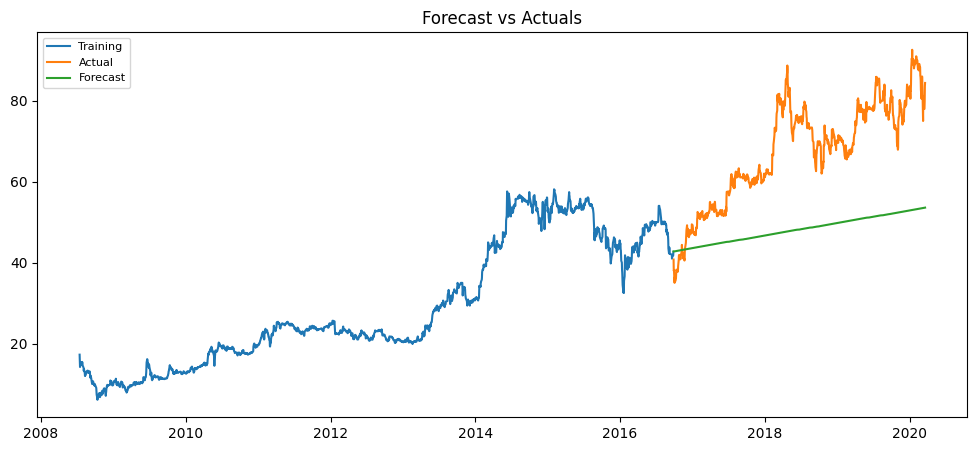

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import pandas as pd

# Build the ARIMA model
model = ARIMA(train, order=(3, 2, 1))
fitted = model.fit()

# Print the summary of the fitted model
print(fitted.summary())

# Forecast
forecast_result = fitted.get_forecast(steps=len(test))  # 119 steps to match the test set length
fc = forecast_result.predicted_mean  # The forecast values
conf = forecast_result.conf_int(alpha=0.05)  # 95% confidence interval

# Making these as pandas series for easy plotting
print(len(fc))
fc_series = pd.Series(fc)
fc_series.index = test.index
lower_series = pd.Series(conf.iloc[:, 0], index=test.index)
upper_series = pd.Series(conf.iloc[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='Training')
plt.plot(test, label='Actual')
plt.plot(fc_series, label='Forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()


- The model is specified as ARIMA(3, 2, 1), indicating three autoregressive terms, two differencing terms, and one moving average term.
- The AIC value has decreased to 5421.362 from 843, indicating improved model fit. Most p-values for the model coefficients are less than 0.05, suggesting their statistical significance and indicating a better overall model.

# **8. Accuracy Metrics for Time Series Forecast** <a class="anchor" id="11"></a>



The commonly used accuracy metrics to judge forecasts are:

1. Mean Absolute Percentage Error (MAPE)
2. Mean Error (ME)
3. Mean Absolute Error (MAE)
4. Mean Percentage Error (MPE)
5. Root Mean Squared Error (RMSE)
6. Lag 1 Autocorrelation of Error (ACF1)
7. Correlation between the Actual and the Forecast (corr)
8. Min-Max Error (minmax)


Typically, we will use three accuracy metrices:-

1. MAPE
2. Correlation and
3. Min-Max Error


can be used. The above three are percentage errors that vary between 0 and 1. That way, we can judge how good is the forecast irrespective of the scale of the series.


In [ ]:
import numpy as np
from statsmodels.tsa.stattools import acf

def forecast_accuracy(forecast, actual):
    # Ensure both forecast and actual are NumPy arrays
    forecast = np.array(forecast)
    actual = np.array(actual)

    # Adjust the length of the forecast to match the actual data
    forecast = forecast[:len(actual)]

    # Calculate various accuracy metrics
    mape = np.mean(np.abs(forecast - actual) / np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual) / actual)   # MPE
    rmse = np.mean((forecast - actual) ** 2) ** 0.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0, 1]   # Correlation
    mins = np.amin(np.hstack([forecast[:, None],
                              actual[:, None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:, None],
                              actual[:, None]]), axis=1)
    minmax = 1 - np.mean(mins / maxs)             # Min-Max
    acf1 = acf(forecast - actual, fft=False)[1]                      # ACF1

    return {'MAPE': mape, 'ME': me, 'MAE': mae, 'MPE': mpe,
            'RMSE': rmse, 'Corr': corr, 'Min-Max': minmax, 'ACF1': acf1}

# Adjust the forecast length and calculate accuracy metrics
accuracy_metrics = forecast_accuracy(fc, test[:len(fc)])


# Print the accuracy metrics
print(accuracy_metrics)


{'MAPE': 0.27104347985134686, 'ME': -19.132204080612507, 'MAE': 19.42690319089779, 'MPE': -0.26328186108746127, 'RMSE': 21.60338771047802, 'Corr': 0.8792583374697938, 'Min-Max': 0.2705970739114043, 'ACF1': 0.9903822296132629}


With a MAPE of approximately 27.10%, the model is about 72.90% accurate in predicting the next 15 observations. This indicates relatively strong performance in forecasting. However, it's essential to automate the model selection process to ensure optimal accuracy and efficiency.










# **9. References** <a class="anchor" id="16"></a>



The ideas and codes in this notebook are taken from the following websites.


1. Prabhakaran, S. (2023) Arima model - complete guide to time series forecasting in python: ML+, Machine Learning Plus. Available at: https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/ (Accessed: 22 April 2024).

2. shaw,sami (2020) Python: Arima model for time series forecasting, GeeksforGeeks. Available at: https://www.geeksforgeeks.org/python-arima-model-for-time-series-forecasting/ (Accessed: 22 April 2024).

3. Dataset:
Aldukhi, F. (2020) Saudi Daily Stocks History (Tadawul), Kaggle. Available at: https://www.kaggle.com/datasets/aldukhi2/saudi-daily-stocks-history-test (Accessed: 22 April 2024).



[Go to Top](#0)